Veri Hazır!
Toplam Satır: 30156
Benzersiz ATM Sayısı: 359


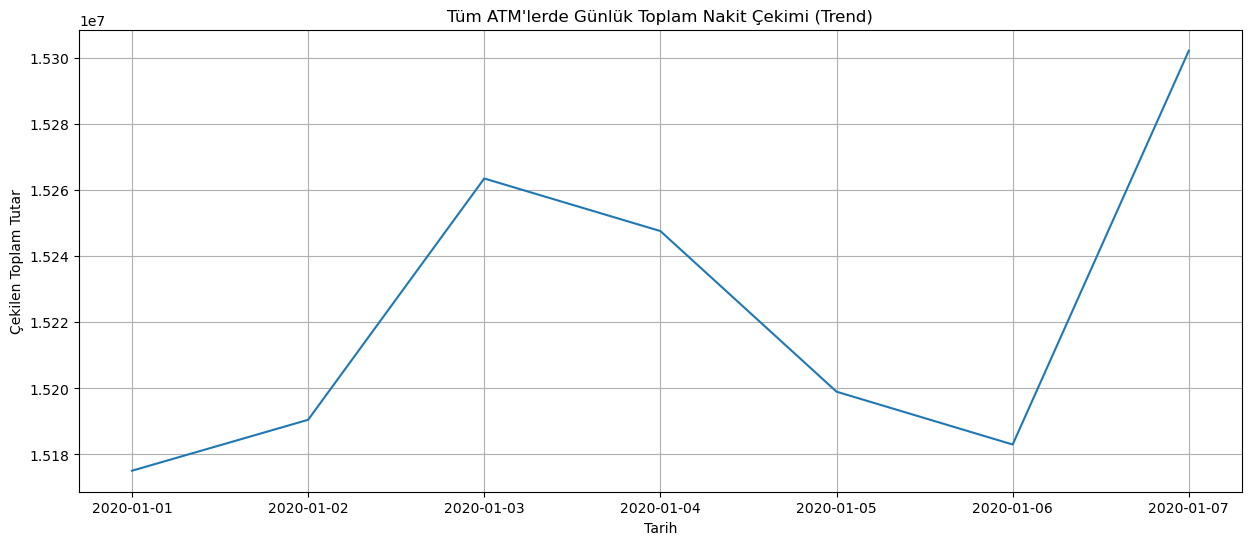

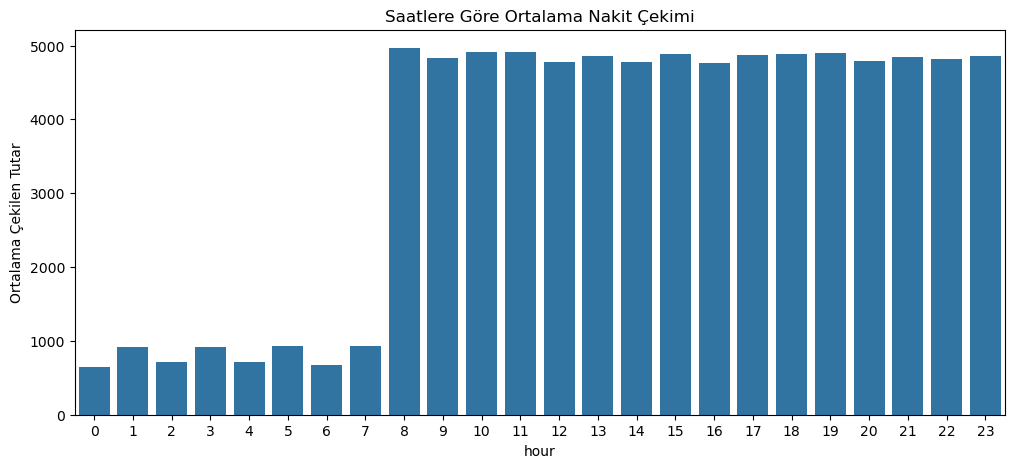

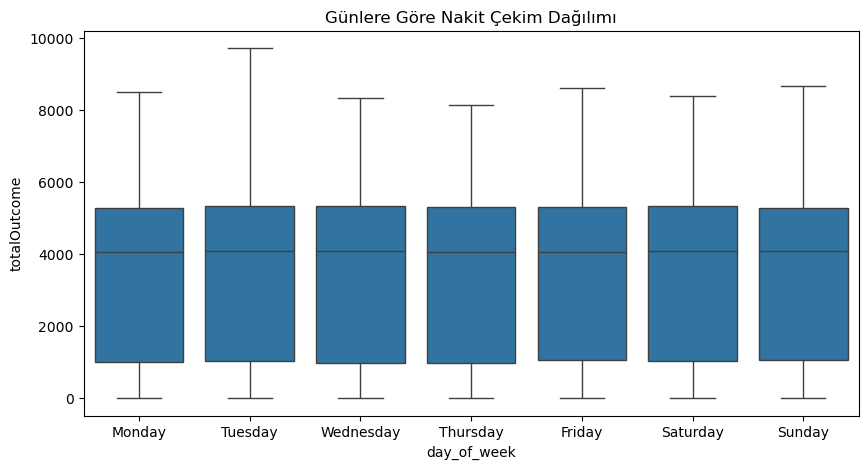

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Veriyi Oku
df = pd.read_csv('../data/atm_data.csv') 

# 2. Tarih Formatını Düzeltme (KRİTİK ADIM)
# transactionTime sütununu datetime formatına çeviriyoruz
df['transactionTime'] = pd.to_datetime(df['transactionTime'])

# Veriyi zamana göre sıralayalım (Time Series için şart)
df.sort_values(by=['atmName', 'transactionTime'], inplace=True)

# 3. İşimizi Kolaylaştıracak Yeni Değişkenler (Feature Engineering Başlangıcı)
# Modelin "Haftanın hangi günü?", "Günün hangi saati?" gibi desenleri anlaması lazım.
df['hour'] = df['transactionTime'].dt.hour
df['day_of_week'] = df['transactionTime'].dt.day_name()
df['date'] = df['transactionTime'].dt.date

print("Veri Hazır!")
print(f"Toplam Satır: {df.shape[0]}")
print(f"Benzersiz ATM Sayısı: {df['atmName'].nunique()}")

# ---------------------------------------------------------
# 4. GÖRSELLEŞTİRME (EDA)
# ---------------------------------------------------------

# A) Toplam Nakit Çekiminin Zamanla Değişimi (Trend Analizi)
# Tüm ATM'lerin toplam çekimini gün bazında toplayıp çizelim
daily_total = df.groupby('date')['totalOutcome'].sum()

plt.figure(figsize=(15, 6))
daily_total.plot()
plt.title("Tüm ATM'lerde Günlük Toplam Nakit Çekimi (Trend)")
plt.ylabel("Çekilen Toplam Tutar")
plt.xlabel("Tarih")
plt.grid(True)
plt.show()

# B) Saatlik Yoğunluk Analizi (Hangi saatte para bitiyor?)
plt.figure(figsize=(12, 5))
sns.barplot(x='hour', y='totalOutcome', data=df, errorbar=None) # ci=None yerine errorbar=None (yeni sürüm)
plt.title("Saatlere Göre Ortalama Nakit Çekimi")
plt.ylabel("Ortalama Çekilen Tutar")
plt.show()

# C) Haftalık Desen (Hafta sonu etkisi var mı?)
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 5))
sns.boxplot(x='day_of_week', y='totalOutcome', data=df, order=order)
plt.title("Günlere Göre Nakit Çekim Dağılımı")
plt.show()